In [1]:
figure_and_data_name = "fig_00_google_trends"

# Import modules and make plots nice

In [2]:
%matplotlib inline
from pytrends.request import TrendReq
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sns.set_context("talk")
sns.set_style("darkgrid")
sns.set_palette("hot_r", n_colors=4)
plt.rcParamsDefault["figure.figsize"] = [12, 7]

# Function for time mean

In [4]:
def get_annual_mean_trend(kw_list, **kwargs):
    trend = TrendReq()
    trend.build_payload(kw_list, timeframe="all")
    trend = trend.interest_over_time()
    trend = trend.resample("1a").mean()
    return trend

# Get Google Trend data

In [5]:
# combine three keywords
rep_trend = get_annual_mean_trend(
    ["reproducibility crisis",
     "replicability crisis", 
     "replication crisis"])
rep_trend_sum = rep_trend.sum(axis=1).rename("Sum: rep... crisis")

# Combine and save data

In [6]:
combined = pd.concat([rep_trend, rep_trend_sum],
                     axis=1)
combined.to_csv("output_data/{}.csv".format(figure_and_data_name))

# Plot and save

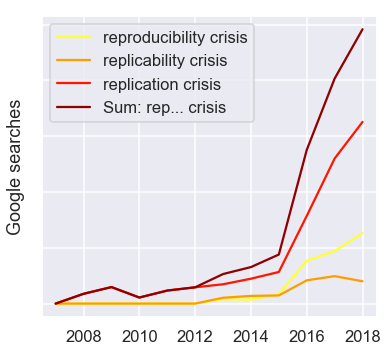

In [7]:
ax = combined[3:].plot(figsize=[6, 6])
ax.set(yticklabels=[])
ax.set_aspect(0.1)
ax.set_xlim(2006.5 - 1970, 2018.5 - 1970)
ax.set_xlabel("")
ax.set_ylabel("Google searches")
ax.legend(frameon=True)
plt.savefig("images/{}.svg".format(figure_and_data_name))

# List software used for the analysis

In [8]:
!(conda list)

# packages in environment at /home/wrath/miniconda3_20171008/envs/repro_examples:
#
asciitree                 0.3.3                      py_2    conda-forge
backcall                  0.1.0                      py_0    conda-forge
blas                      1.0                         mkl  
bleach                    2.1.4                      py_1    conda-forge
bokeh                     0.13.0                   py36_0  
bzip2                     1.0.6                h14c3975_5  
ca-certificates           2018.03.07                    0  
certifi                   2018.8.24                py36_1  
cftime                    1.0.0b1          py36h035aef0_0  
chardet                   3.0.4                     <pip>
click                     6.7                      py36_0  
cloudpickle               0.5.5                    py36_0  
curl                      7.61.0               h84994c4_0  
cycler                    0.10.0                   py36_0  
cytoolz                   0.9.0.1      